# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd
import time
import datetime as dt
import json
from scipy import stats
from scipy.stats import linregress
from sklearn import datasets

# open and link api_key
from config import api_key

from citipy import citipy


## Generate Cities List

In [2]:
lats_longs = []
cities_lists = []

#Latitude = -90 to 90 degress
#Longitude = -180 to 180 degrees

#Generate random longitude and latitude combinations

latitude = np.random.uniform(low = -90, high = 90, size = 1500)
longitude = np.random.uniform(low = -180, high = 180, size = 1500)

lats_longs = zip(latitude, longitude)

#Identify nearest cities of each longitude and latitude combinations
for lat_long in lats_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    #If the city is unique, add it to the cities list
    
    if city not in cities_lists:
        cities_lists.append(city)
        
#print city count.

print(len(cities_lists))

587


In [3]:
print(cities_lists)

['karaton', 'tiksi', 'harwich', 'samarai', 'busselton', 'norman wells', 'mataura', 'matara', 'yarmouth', 'cabo san lucas', 'hobart', 'vostok', 'punta arenas', 'srednekolymsk', 'puerto ayora', 'atambua', 'avera', 'severo-kurilsk', 'vaini', 'nizhneyansk', 'sitka', 'new norfolk', 'bredasdorp', 'buluang', 'cape town', 'chokurdakh', 'lasa', 'jamestown', 'longyearbyen', 'ribeira grande', 'barrow', 'salisbury', 'samagaltay', 'iqaluit', 'hermanus', 'lebu', 'vestmannaeyjar', 'khatanga', 'cardston', 'carnarvon', 'venado tuerto', 'rikitea', 'ushuaia', 'hilo', 'castro', 'bengkulu', 'grand gaube', 'georgetown', 'kapaa', 'sarankhola', 'kitui', 'kendari', 'nouakchott', 'ulladulla', 'katsuura', 'nome', 'kaitangata', 'camacha', 'hithadhoo', 'avarua', 'owatonna', 'nalut', 'aklavik', 'deputatskiy', 'qaanaaq', 'san patricio', 'anloga', 'mar del plata', 'birao', 'lavrentiya', 'atuona', 'amderma', 'sioux lookout', 'saint-pierre', 'ahipara', 'illoqqortoormiut', 'yerbogachen', 'gwadar', 'marcona', 'port eliza

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_pd = pd.read_csv("02-Homework_06-Python-APIs_Instructions_output_data_cities.csv")
cities_pd.columns


Index(['City_ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat',
       'Lng', 'Max Temp', 'Wind Speed'],
      dtype='object')

In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

#Build query url
# api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=2f77e934d464faaed5bc83bb33ab53ca
query_url = f"{base_url}appid={api_key}&units={units}&q="



In [6]:
response = requests.get(query_url + city).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 41.4635,
        "lon": 48.806
    },
    "dt": 1616804294,
    "id": 584717,
    "main": {
        "feels_like": 38.12,
        "grnd_level": 1011,
        "humidity": 95,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": 42.84,
        "temp_max": 42.84,
        "temp_min": 42.84
    },
    "name": "Xa\u00e7maz",
    "sys": {
        "country": "AZ",
        "sunrise": 1616812579,
        "sunset": 1616857426
    },
    "timezone": 14400,
    "visibility": 5125,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 353,
        "gust": 7,
        "speed": 4.97
    }
}


In [7]:
print(city)

xacmaz


In [8]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

#Build query url
# api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=2f77e934d464faaed5bc83bb33ab53ca
query_url = f"{base_url}appid={api_key}&units={units}&q="

#Set up lists parameters 

cities = []
countries = []
lat = []
lon = []
cloudiness = []
max_temp = []
humidity = []
wind_speed = []
date = []

#Loop through lists and perform request on each dataset

print(f"Initialising Data Retrieval")
print(f"----------------------------------")

#Create Counters
i = 1
#record_count = 1
#set_count = 1
for city in cities_lists:
    response = requests.get(query_url + city).json()
    
    try:
        cities.append(response['name'])
        countries.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        
        print(f"Processing Record {i} | {city}")
        i += 1

    except:
        print(F"City not found. Skipping......")

        continue

        
print(f"-----------------------------")
print(f"---Data Retrieval Complete---")
print(f"-----------------------------")
        




Initialising Data Retrieval
----------------------------------
Processing Record 1 | karaton
Processing Record 2 | tiksi
Processing Record 3 | harwich
Processing Record 4 | samarai
Processing Record 5 | busselton
Processing Record 6 | norman wells
Processing Record 7 | mataura
Processing Record 8 | matara
Processing Record 9 | yarmouth
Processing Record 10 | cabo san lucas
Processing Record 11 | hobart
Processing Record 12 | vostok
Processing Record 13 | punta arenas
Processing Record 14 | srednekolymsk
Processing Record 15 | puerto ayora
Processing Record 16 | atambua
Processing Record 17 | avera
Processing Record 18 | severo-kurilsk
Processing Record 19 | vaini
City not found. Skipping......
Processing Record 20 | sitka
Processing Record 21 | new norfolk
Processing Record 22 | bredasdorp
Processing Record 23 | buluang
Processing Record 24 | cape town
Processing Record 25 | chokurdakh
Processing Record 26 | lasa
Processing Record 27 | jamestown
Processing Record 28 | longyearbyen
Proc

Processing Record 234 | ola
Processing Record 235 | pangnirtung
Processing Record 236 | kupang
Processing Record 237 | jiaojiang
Processing Record 238 | mustasaari
Processing Record 239 | alice springs
Processing Record 240 | havre-saint-pierre
Processing Record 241 | byron bay
Processing Record 242 | quatre cocos
Processing Record 243 | mount gambier
Processing Record 244 | vuktyl
Processing Record 245 | ipanguacu
City not found. Skipping......
Processing Record 246 | magway
Processing Record 247 | pevek
City not found. Skipping......
Processing Record 248 | alindao
Processing Record 249 | provideniya
Processing Record 250 | coahuayana
Processing Record 251 | itumba
Processing Record 252 | lagoa
Processing Record 253 | osoyoos
Processing Record 254 | sukumo
Processing Record 255 | san quintin
Processing Record 256 | sorland
Processing Record 257 | kruisfontein
Processing Record 258 | gerash
Processing Record 259 | ranong
Processing Record 260 | xichang
Processing Record 261 | samana
P

Processing Record 466 | schwalmtal
Processing Record 467 | locri
Processing Record 468 | pedernales
Processing Record 469 | treinta y tres
Processing Record 470 | eydhafushi
City not found. Skipping......
Processing Record 471 | aitape
Processing Record 472 | brikama
Processing Record 473 | lyuban
City not found. Skipping......
City not found. Skipping......
Processing Record 474 | cabra
Processing Record 475 | skegness
Processing Record 476 | beringovskiy
Processing Record 477 | hammerfest
Processing Record 478 | turayf
Processing Record 479 | suarez
Processing Record 480 | kudahuvadhoo
Processing Record 481 | ilebo
Processing Record 482 | usinsk
Processing Record 483 | sault sainte marie
Processing Record 484 | west bay
Processing Record 485 | samastipur
Processing Record 486 | pirovskoye
Processing Record 487 | la libertad
Processing Record 488 | maceio
Processing Record 489 | biloela
Processing Record 490 | san borja
Processing Record 491 | lucapa
Processing Record 492 | poum
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_df = {"Date": date, "City": cities, "Country": countries, "Longitude": lon, "Latitude": lat, "Cloudiness": cloudiness, "Max Temp": max_temp, "Humidity": humidity, "Wind Speed": wind_speed }
weather_data = pd.DataFrame(weather_df)
weather_data

,Date,City,Country,Longitude,Latitude,Cloudiness,Max Temp,Humidity,Wind Speed
0,1616804300,Karaton,ID,106.1045,-6.3424,20,82.99,83,3.44
1,1616804300,Tiksi,RU,128.8694,71.6872,100,10.83,91,6.51
2,1616804301,Harwich,GB,1.2844,51.9419,56,42.01,71,10.00
3,1616804302,Samarai,PG,150.6667,-10.6167,93,83.80,75,11.34
4,1616804302,Busselton,AU,115.3333,-33.6500,69,57.00,87,5.50
...,...,...,...,...,...,...,...,...,...
543,1616804545,Polyarnyye Zori,RU,32.4981,67.3661,67,28.99,96,3.18
544,1616804545,Ginir,ET,40.7000,7.1333,70,58.21,30,4.70
545,1616804546,Lompoc,US,-120.4579,34.6391,20,61.00,72,14.97
546,1616804546,Whitley Bay,GB,-1.4471,55.0397,90,39.20,70,18.41


In [14]:
weather_data.count()

Date          548
City          548
Country       548
Longitude     548
Latitude      548
Cloudiness    548
Max Temp      548
Humidity      548
Wind Speed    548
dtype: int64

In [15]:
#save df as a csv

weather_data.to_csv('weather_data.csv')

In [16]:
#check csv dataframe

weather_data.head()

,Date,City,Country,Longitude,Latitude,Cloudiness,Max Temp,Humidity,Wind Speed
0,1616804300,Karaton,ID,106.1045,-6.3424,20,82.99,83,3.44
1,1616804300,Tiksi,RU,128.8694,71.6872,100,10.83,91,6.51
2,1616804301,Harwich,GB,1.2844,51.9419,56,42.01,71,10.00
3,1616804302,Samarai,PG,150.6667,-10.6167,93,83.80,75,11.34
4,1616804302,Busselton,AU,115.3333,-33.6500,69,57.00,87,5.50


In [17]:
weather_data.columns


Index(['Date', 'City', 'Country', 'Longitude', 'Latitude', 'Cloudiness',
       'Max Temp', 'Humidity', 'Wind Speed'],
      dtype='object')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
weather_data.describe()

,Date,Longitude,Latitude,Cloudiness,Max Temp,Humidity,Wind Speed
count,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,1.616804e+09,17.190250,21.046384,53.364964,55.393595,72.660584,7.803504
std,8.284110e+01,89.260410,32.882065,38.360767,25.681463,21.522611,5.644086
min,1.616804e+09,-175.200000,-54.800000,0.000000,-32.460000,1.000000,0.200000
25%,1.616804e+09,-62.548350,-6.872800,19.500000,38.880000,62.000000,3.440000
50%,1.616804e+09,21.513800,22.281200,56.500000,63.500000,76.000000,6.410000
75%,1.616804e+09,93.779175,48.957950,92.250000,76.012500,88.000000,10.455000
max,1.616805e+09,179.316700,78.218600,100.000000,89.600000,100.000000,27.630000


In [19]:
humidity_test = weather_data.loc[weather_data['Humidity'] > 99]
humidity_test

,Date,City,Country,Longitude,Latitude,Cloudiness,Max Temp,Humidity,Wind Speed
46,1616804110,George Town,MY,100.3354,5.4112,40,78.01,100,2.15
109,1616804347,Cabedelo,BR,-34.8339,-6.9811,40,75.20,100,5.75
152,1616804367,Nikolskoye,RU,30.7861,59.7035,75,34.00,100,2.24
153,1616804368,Kiryat Gat,IL,34.7642,31.6100,99,52.00,100,9.78
162,1616804371,Dikson,RU,80.5464,73.5069,100,-6.25,100,10.87
176,1616804376,Walvis Bay,NA,14.5053,-22.9575,37,61.00,100,2.30
184,1616804379,Colon,VE,-72.2605,8.0313,75,71.60,100,3.44
219,1616804398,Aksarka,RU,67.7975,66.5606,86,-9.31,100,2.17
229,1616804402,Torbay,CA,-52.7314,47.6666,90,44.01,100,9.22
235,1616804404,Kupang,ID,123.5833,-10.1667,20,82.40,100,1.14


In [20]:
print(f"The max humidity in the dataframe is 100.  Therefore, none of the cities have humidity >100")

The max humidity in the dataframe is 100.  Therefore, none of the cities have humidity >100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

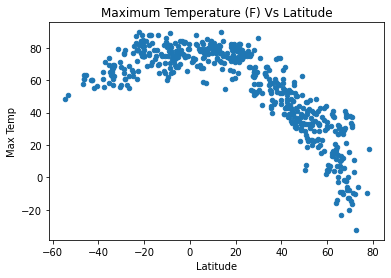

In [21]:
lat_vs_temp = weather_data.plot(kind = "scatter", x = "Latitude", y = "Max Temp", title = "Maximum Temperature (F) Vs Latitude")
plt.show()

## Latitude vs. Humidity Plot

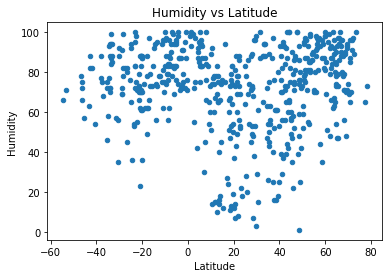

In [22]:
lat_vs_humidity = weather_data.plot(kind = "scatter", x = "Latitude", y = "Humidity", title = "Humidity vs Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

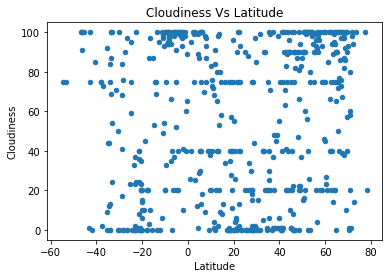

In [23]:
lat_vs_cloudiness = weather_data.plot(kind = "scatter", x = "Latitude", y = "Cloudiness", title = "Cloudiness Vs Latitude")
plt.show()

## Latitude vs. Wind Speed Plot

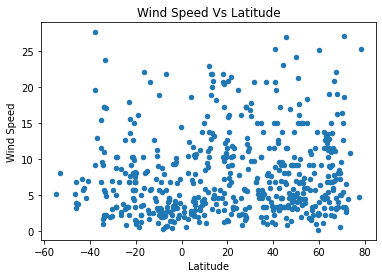

In [24]:
lat_vs_windspeed = weather_data.plot(kind = "scatter", x = "Latitude", y = "Wind Speed", title = "Wind Speed Vs Latitude")
plt.show()

## Linear Regression

In [28]:
def plot_linear_regression(x_value, y_value, title, text_coordinates):
    
    #Southern Hemisphere Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 
    
    #plot
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f" The r-value is : {rvalue**2}")
    plt.show()

In [29]:
#Seperate cities in dataset according to Northern and Southern Hemisphere.

nth_hem = weather_data.loc[weather_data["Latitude"] >= 0]
sth_hem = weather_data.loc[weather_data["Latitude"] < 0]

print(len(nth_hem))
print(len(sth_hem))
print(f"There are {len(nth_hem)} cities in the Northern Hemisphere")
print(f"There are {len(sth_hem)} cities in the Southern Hemisphere")




379
169
There are 379 cities in the Northern Hemisphere
There are 169 cities in the Southern Hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:
nth_hem.head()

,Date,City,Country,Longitude,Latitude,Cloudiness,Max Temp,Humidity,Wind Speed
1,1616804300,Tiksi,RU,128.8694,71.6872,100,10.83,91,6.51
2,1616804301,Harwich,GB,1.2844,51.9419,56,42.01,71,10.00
5,1616804302,Norman Wells,CA,-126.8329,65.2820,75,30.20,47,2.30
7,1616804303,Matara,LK,80.5353,5.9485,100,76.87,87,7.90
8,1616804303,Yarmouth,US,-70.2286,41.7057,1,54.00,93,14.97


 The r-value is : 0.7958201090030961


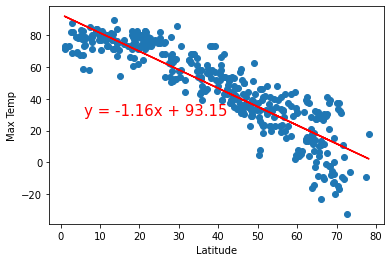

In [33]:
#Linear Regression for Northern Hemisphere
x_value = nth_hem["Latitude"]
y_value = nth_hem["Max Temp"]
plot_linear_regression(x_value, y_value, 'Max Temp', (6, 30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-value is : 0.3349672110480018


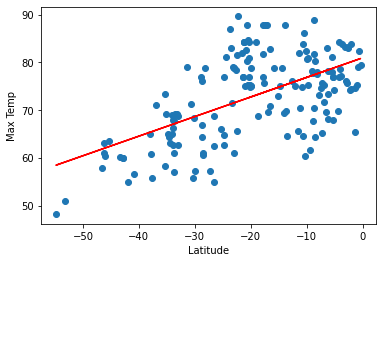

In [38]:
x_value = sth_hem["Latitude"]
y_value = sth_hem["Max Temp"]
plot_linear_regression(x_value, y_value, 'Max Temp', (-55, 90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-value is : 0.06878990529812921


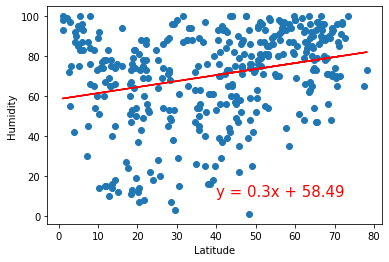

In [39]:
x_value = nth_hem["Latitude"]
y_value = nth_hem["Humidity"]
plot_linear_regression(x_value, y_value, 'Humidity', (40, 10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-value is : 0.058185798614256386


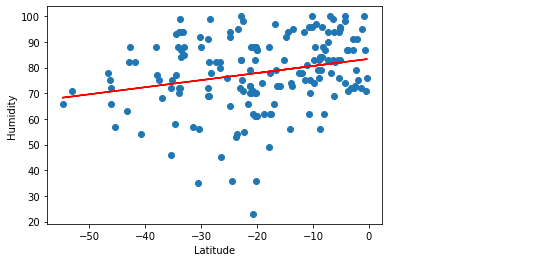

In [40]:
x_value = sth_hem["Latitude"]
y_value = sth_hem["Humidity"]
plot_linear_regression(x_value, y_value, 'Humidity', (6, 30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-value is : 0.06958137368448657


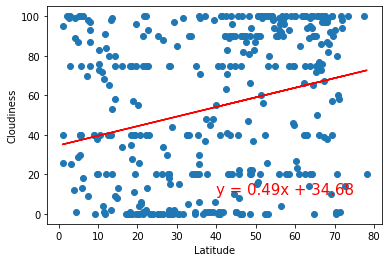

In [42]:
x_value = nth_hem["Latitude"]
y_value = nth_hem["Cloudiness"]
plot_linear_regression(x_value, y_value, 'Cloudiness', (40, 10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-value is : 0.02786096782777492


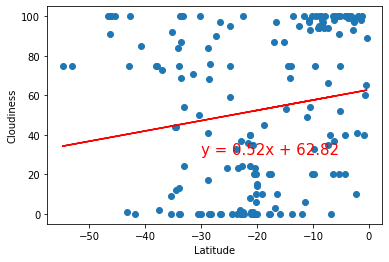

In [43]:
x_value = sth_hem["Latitude"]
y_value = sth_hem["Cloudiness"]
plot_linear_regression(x_value, y_value, 'Cloudiness', (-30, 30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-value is : 6.409457063148564e-05


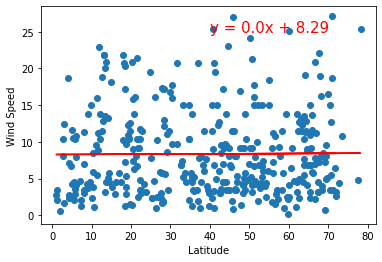

In [44]:
x_value = nth_hem["Latitude"]
y_value = nth_hem["Wind Speed"]
plot_linear_regression(x_value, y_value, 'Wind Speed', (40, 25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-value is : 0.040691663780998415


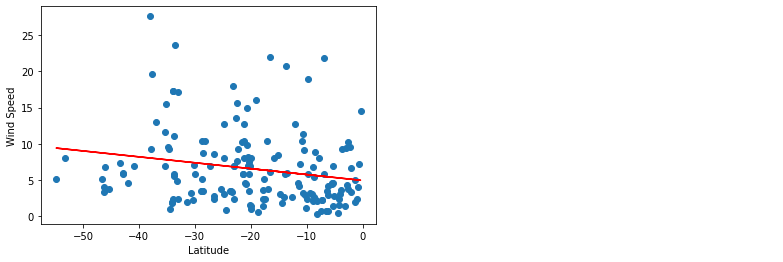

In [45]:
x_value = sth_hem["Latitude"]
y_value = sth_hem["Wind Speed"]
plot_linear_regression(x_value, y_value, 'Wind Speed', (50, 20))